In [1]:
# list library yang digunakan
from google.colab.patches import cv2_imshow as imshow
from sklearn.cluster import KMeans
import numpy as np
import cv2 as cv
import urllib.request
import math

In [2]:
!gdown --id '1C4diUKr2JHSGcnCEbA-rFCWOqfshzS64' -O citra.jpg

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1C4diUKr2JHSGcnCEbA-rFCWOqfshzS64
To: /content/citra.jpg
100% 8.77k/8.77k [00:00<00:00, 12.4MB/s]


In [3]:
def visualize_colors(cluster, centroids):
	# Get the number of different clusters, create histogram, and normalize
	labels = np.arange(0, len(np.unique(cluster.labels_)) + 1)
	(hist, _) = np.histogram(cluster.labels_, bins = labels)
	hist = hist.astype("float")
	hist /= hist.sum()

	# Create frequency rect and iterate through each cluster's color and percentage
	rect = np.zeros((50, 300, 3), dtype=np.uint8)
	colors = sorted([(percent, color) for (percent, color) in zip(hist, centroids)])
	start = 0
	for (percent, color) in colors:
			print(color, "{:0.2f}%".format(percent * 100))
			end = start + (percent * 300)
			cv.rectangle(rect, (int(start), 0), (int(end), 50), \
										color.astype("uint8").tolist(), -1)
			start = end
	return rect, colors

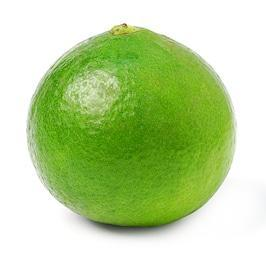

[114.05070237 167.43816631  45.45233914] 46.12%
[250.35225931 251.28818289 248.72458946] 53.88%


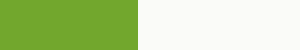

[(0.4612348178137652, array([114.05070237, 167.43816631,  45.45233914])), (0.5387651821862348, array([250.35225931, 251.28818289, 248.72458946]))]


In [7]:
# Load image and convert to a list of pixels

image = cv.imread('citra.jpg')
imshow(image)
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
reshape = image.reshape((image.shape[0] * image.shape[1], 3))

# Find and display most dominant colors
cluster = KMeans(n_clusters=2).fit(reshape)
visualize, colors = visualize_colors(cluster, cluster.cluster_centers_)
visualize = cv.cvtColor(visualize, cv.COLOR_RGB2BGR)
imshow(visualize)
print(colors)